# Project E8: KAGGLE - TWO PATHS TO PREDICTING SUCCESS

Project for IDS course 2025. By Nele-Liis Võhma and Marek Kalda.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

## 1. Exploring the dataset

In [2]:
data = pd.read_csv("StudentPerformanceFactors.csv")
display(data.head())
display(data.info())
display(data.describe(include="all"))

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

None

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


### Missing values per each column

In [44]:
print(data.isna().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


### Categorical features: checking unique values

In [55]:
categorical = data.select_dtypes(include='object')
for col in categorical.columns:
    print(col, data[col].unique())

Parental_Involvement ['Low' 'Medium' 'High']
Access_to_Resources ['High' 'Medium' 'Low']
Extracurricular_Activities ['No' 'Yes']
Motivation_Level ['Low' 'Medium' 'High']
Internet_Access ['Yes' 'No']
Family_Income ['Low' 'Medium' 'High']
Teacher_Quality ['Medium' 'High' 'Low' nan]
School_Type ['Public' 'Private']
Peer_Influence ['Positive' 'Negative' 'Neutral']
Learning_Disabilities ['No' 'Yes']
Parental_Education_Level ['High School' 'College' 'Postgraduate' nan]
Distance_from_Home ['Near' 'Moderate' 'Far' nan]
Gender ['Male' 'Female']


NaN values in columns "Teacher_Quality", "Parental_Education_Level" and "Distance_from_Home".

### Numeric features: histogram of numerical features distributions and checking correlation with target (exam score).

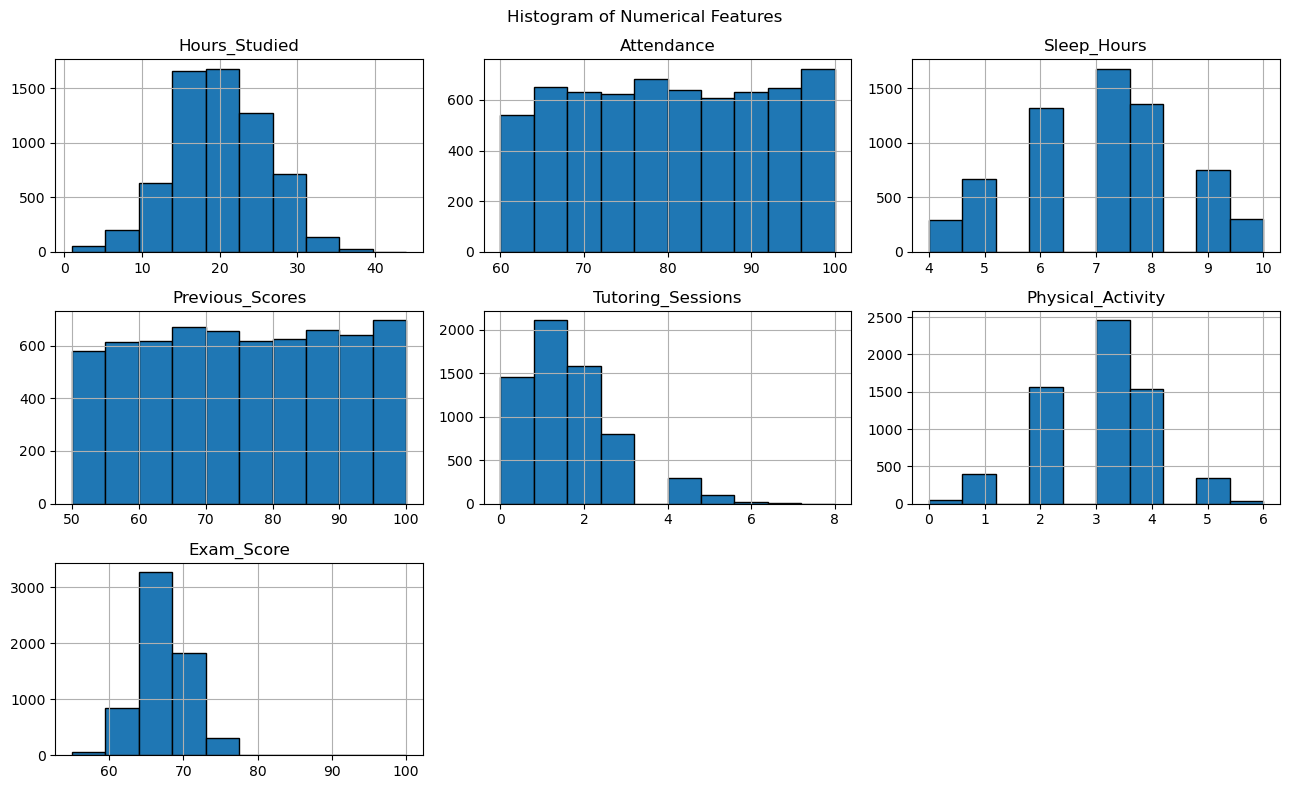

In [105]:
numeric = data.select_dtypes(include='int64')
data[numeric.columns].hist(bins=10, figsize=(13, 8), edgecolor='black')
plt.suptitle("Histogram of Numerical Features")
plt.grid(True)
plt.tight_layout()
plt.show()

Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64

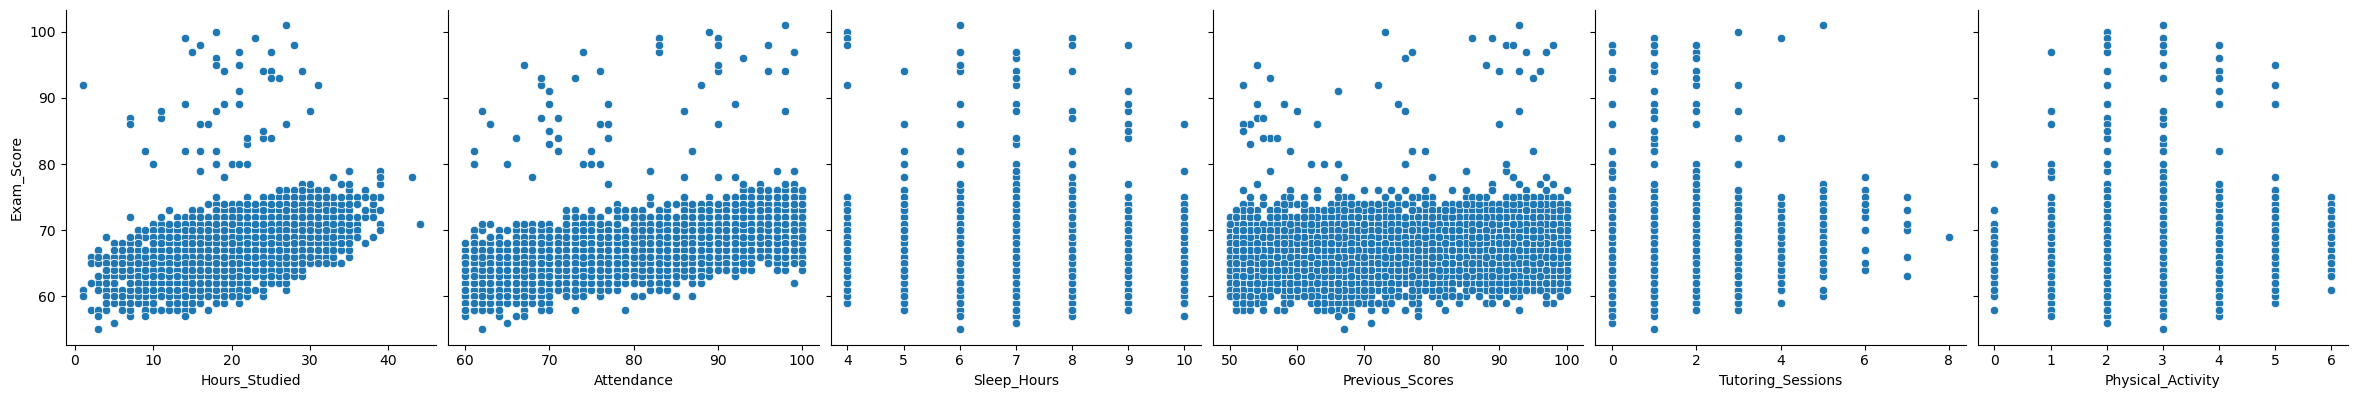

In [67]:
target = "Exam_Score"
display(corr[target].sort_values(ascending=False))

sns.pairplot(numeric, x_vars=numeric.drop(columns=[target]).columns, y_vars=target, height=4, kind='scatter')
plt.show()

### Categorical features versus target value

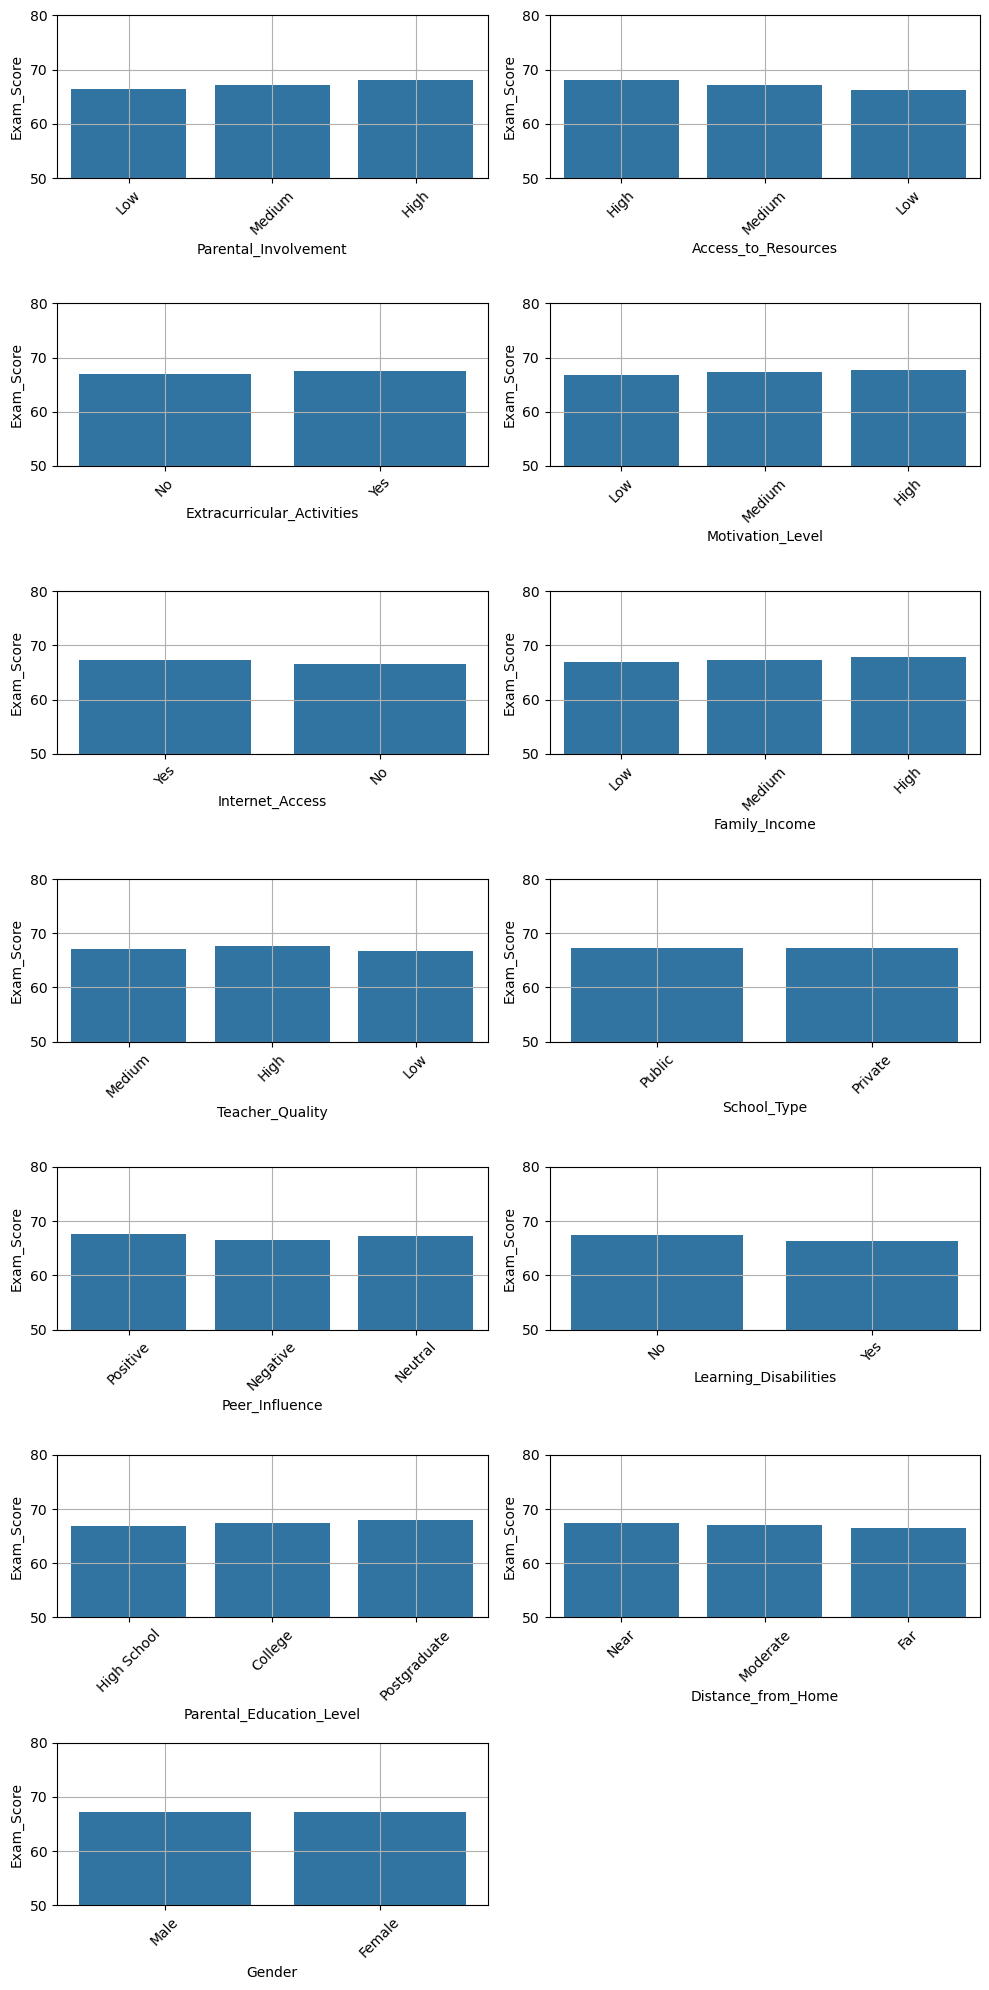

In [107]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(categorical.columns, 1):
    plt.subplot(len(categorical.columns)//2 + 1, 2, i)
    sns.barplot(
        data=data,
        x=col,
        y=target,
        estimator='mean',
        errorbar=None
    )
    plt.ylim(50, 80)
    #plt.title(f"Average Exam Score by {col}")
    plt.xticks(rotation=45)
    plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Preparing the data for modelling

In [108]:
data = data.dropna()
data.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [109]:
print("Grade range:", data["Exam_Score"].min(), "-", data["Exam_Score"].max())
print("Missing values count:", data["Exam_Score"].isna().sum())

Grade range: 55 - 100
Missing values count: 0


In [110]:
display(data[data["Exam_Score"] == 101]) ## Everything other than the exam score seems normal
data.loc[data["Exam_Score"] == 101, "Exam_Score"] = 100
print("Max grade after changes:", data["Exam_Score"].max())

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


Max grade after changes: 100


In [111]:
data.drop_duplicates()
data.shape

(6378, 20)

In [112]:
#for col in data.columns: # Check for any outliers and spelling errors
#    print(f"Column {col}")
#    print(data[col].value_counts(dropna=False))
#    print("-"*40)

<Axes: xlabel='Motivation_Level', ylabel='Exam_Score'>

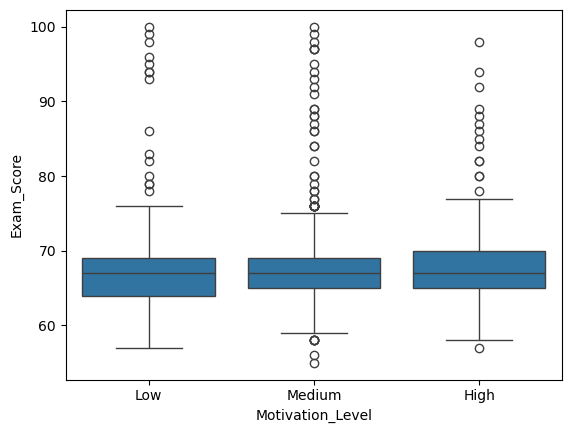

In [113]:
sns.boxplot(data=data, x="Motivation_Level", y="Exam_Score")

In [114]:
# Correlation matrix
corr = data.corr(numeric_only=True)

# Focus on correlation with final_grade
print(corr['Exam_Score'].sort_values(ascending=False))

Exam_Score           1.000000
Attendance           0.580394
Hours_Studied        0.445209
Previous_Scores      0.174292
Tutoring_Sessions    0.156769
Physical_Activity    0.025155
Sleep_Hours         -0.017149
Name: Exam_Score, dtype: float64


In [115]:
data_dummies_eval = pd.get_dummies(data) # Needs to be used
print(data_dummies_eval.corr()['Exam_Score'].sort_values(ascending=False))

Exam_Score                               1.000000
Attendance                               0.580394
Hours_Studied                            0.445209
Previous_Scores                          0.174292
Tutoring_Sessions                        0.156769
Access_to_Resources_High                 0.141711
Parental_Involvement_High                0.139788
Parental_Education_Level_Postgraduate    0.092298
Learning_Disabilities_No                 0.083926
Distance_from_Home_Near                  0.081280
Peer_Influence_Positive                  0.080214
Family_Income_High                       0.073546
Teacher_Quality_High                     0.071623
Extracurricular_Activities_Yes           0.063051
Motivation_Level_High                    0.062914
Internet_Access_Yes                      0.051281
Physical_Activity                        0.025155
Family_Income_Medium                     0.024963
Motivation_Level_Medium                  0.022556
Parental_Education_Level_College         0.017985


In [116]:
data_dummies = pd.get_dummies(data, drop_first=True) 

X = data_dummies.drop(columns=["Exam_Score"])
y = data_dummies["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## 3. Training regression models

In [117]:
def MSE(y_target, y_pred):
    return np.mean((y_target - y_pred)**2)

def RMSE(y_target, y_pred):
    return np.sqrt(MSE(y_target, y_pred))

In [118]:
models = {
    "Linear": lm.LinearRegression(),
    "Ridge": lm.Ridge(alpha=1.0),
    "Lasso": lm.Lasso(alpha=0.01),
    "RandomForest": RandomForestRegressor(random_state=5)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = MSE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "RMSE": rmse, "R2": r2}

In [119]:
for name, score in results.items():
    print(name)
    for metric, value in score.items():
        print(metric, value)

Linear
MSE 4.365297082255297
RMSE 2.089329337910923
R2 0.7171117952648646
Ridge
MSE 4.365535631462106
RMSE 2.0893864246381297
R2 0.7170963363497933
Lasso
MSE 4.406830567200483
RMSE 2.0992452375081103
R2 0.7144202641339599
RandomForest
MSE 6.4359579153605
RMSE 2.5369189808428056
R2 0.5829249313115275


## 4. Training classification models